In [1]:
from modules.base import *

#### tool 사용하기
- LLM이 판단했을때, Tool을 사용해야 할 경우, AIMessage 에 툴 호출 정보가 추가됨.
    - content 비어있음.

    - additional_kwargs에 tool_calls 정보 추가됨.

    - `예시) AIMessage(content='', additional_kwargs={'tool_calls'..`

- tools_condition : 메시지가 tool call 인지 아닌지 판단하는 함수
    - tool call 인 경우, tool 노드로 이동
    
    - tool call 이 아닌 경우, END로 이동

---

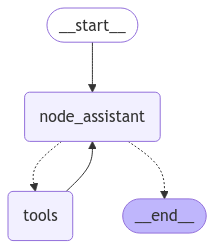

In [2]:
@trace_function()
def multiply(a: int, b: int) -> int:
    """Multiply a and b.

    Args:
        a: first int
        b: second int
    """
    return a * b

@trace_function()
def add(a: int, b: int) -> int:
    """Adds a and b.

    Args:
        a: first int
        b: second int
    """
    return a + b

@trace_function()
def divide(a: int, b: int) -> float:
    """Divide a and b.

    Args:
        a: first int
        b: second int
    """
    return a / b

tools = [divide, add, multiply]
llm_with_tools = llm.bind_tools(tools, parallel_tool_calls=False)

@trace_function()
def node_assistant(state:MessagesState):
   system_message = SystemMessage(content="You are a helpful assistant tasked with performing arithmetic on a set of inputs.")
   return_state = {"messages": [llm_with_tools.invoke([system_message] + state["messages"])]}
   return return_state

builder = StateGraph(MessagesState)
builder.add_node("node_assistant", node_assistant)
builder.add_node("tools", ToolNode(tools)) # execute tool when AI message is tool call
builder.add_edge(START, "node_assistant")
builder.add_conditional_edges("node_assistant", tools_condition)
builder.add_edge("tools", "node_assistant")
graph = builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [4]:
messages = [HumanMessage(content="Add 3 and 4. Multiply the output by 2. Divide the output by 5")]
messages = graph.invoke({"messages": messages})


🚀 Passing Through [node_assistant] ..

#### [Input State]
  args: ({'messages': [HumanMessage(content='Add 3 and 4. Multiply the output by 2. Divide the output by 5', additional_kwargs={}, response_metadata={}, id='98510fe5-e302-4855-ae9b-8f1609dac9e4')]},)
  kwargs: {}

#### [Output State]
  result: {'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_h4LCC6GLzJbdaX3a2c82UCdR', 'function': {'arguments': '{"a":3,"b":4}', 'name': 'add'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 145, 'total_tokens': 163, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_b7d65f1a5b', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-2a41e35f-dfa1-4797-aa91-f607ad6f744c-0', tool_c

In [6]:
messages

{'messages': [HumanMessage(content='Add 3 and 4. Multiply the output by 2. Divide the output by 5', additional_kwargs={}, response_metadata={}, id='98510fe5-e302-4855-ae9b-8f1609dac9e4'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_h4LCC6GLzJbdaX3a2c82UCdR', 'function': {'arguments': '{"a":3,"b":4}', 'name': 'add'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 145, 'total_tokens': 163, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_b7d65f1a5b', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-2a41e35f-dfa1-4797-aa91-f607ad6f744c-0', tool_calls=[{'name': 'add', 'args': {'a': 3, 'b': 4}, 'id': 'call_h4LCC6GLzJbdaX3a2c82UCdR', 'type': 'tool_call'}], usage_metadata={'